In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

# Define the functions for the prediction and error calculation:

In [2]:
def calculatePath ( x_or_ypoints, timeDelta):
 
    timeArray = np.arange(0, timeDelta*len(x_or_ypoints), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done

    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    polynomial_features = polynomial.fit_transform(timeArray.reshape(-1, 1))
    polynomial_regression_model = LinearRegression()

    model = polynomial_regression_model.fit(polynomial_features, x_or_ypoints)

    return model.coef_, model.intercept_

In [3]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue**2*coefficients[1]+timeValue*coefficients[0]+intercept)
    
    return predictedPoints

In [4]:
def euclideanDistance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

calculateErrors iterates through the predicted points and calculates their error with respect to the real data point.

In [5]:
def calculateErrors (firstPointPosi, timeToPredict, timeBetweenSamples, xPositons, yPositioins, xPredictions, yPredictions):
    index = firstPointPosi
    errorList = []
    while index < firstPointPosi+(timeToPredict/timeBetweenSamples):
        error = euclideanDistance(xPositions[index], yPositions[index], xPredictions[index-firstPointPosi], yPredictions[index-firstPointPosi])
        errorList.append(error)
        index = index+1
    return errorList

In [6]:
def calcualteAverageError (errorList):
    length = len(errorList)
    width = len(errorList[0])
    
    errorSumList = []
    
    indexLength = 0
    indexWitdth = 0
    while indexWitdth < width:
        sumOfErrors = 0
        indexLength = 0
        while indexLength < length:
            sumOfErrors = sumOfErrors + errorList[indexLength][indexWitdth]
            indexLength = indexLength + 1
            
        errorSumList.append(sumOfErrors/length)
        indexWitdth = indexWitdth+1
    return errorSumList

In [7]:
def calculateRMSError (errorList):
    length = len(errorList)
    width = len(errorList[0])
    
    errorSumList = []
    
    indexLength = 0
    indexWitdth = 0
    while indexWitdth < width:
        sumOfErrors = 0
        indexLength = 0
        while indexLength < length:
            sumOfErrors = sumOfErrors + errorList[indexLength][indexWitdth]**2
            indexLength = indexLength + 1
            
        errorSumList.append(math.sqrt(sumOfErrors/length))
        indexWitdth = indexWitdth+1
    return errorSumList

In [8]:
def plotter (xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetoPredict):
    plt.figure()
    plt.grid("True")
    plt.scatter(xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], yPositions [startingPoint+increment: startingPoint+increment+amountOfPoints], label = "UWB positions for prediction", color = "r", marker = "1")
    plt.scatter(xPredictions, yPredictions, label= "Predicted positions", color = "g", marker = "2")
    plt.scatter(xPositions[startingPoint+increment+amountOfPoints+1: -1], yPositions [startingPoint+increment+amountOfPoints+1: -1], label = "Real future positions", color = "b", marker = "3")
    plt.xlim(-2, 2)
    plt.legend()
    plt.title("Path with prediction done for %s secs, considering last %s positions" % (timetoPredict, amountOfPoints))
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.show()

# Straight line: x = constant

It will be assumed that every data point has been obtained with a constant sample time of 0.25 seconds. Arrays of X position values and Y position values will be created; they will have a length of 40, which is the equivalent of a simultaion of 10s. A moving speed of 1m/s will be used as well, assumming constant speed.

In [9]:
xPositions = np.zeros(60)
yPositions = np.arange(0, 15, 0.25)

### Plot the the data without noise.

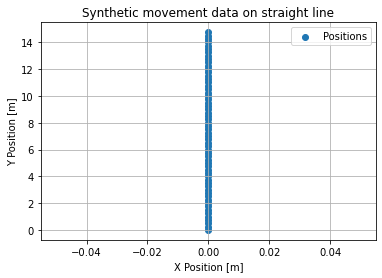

In [10]:
plt.figure()
plt.scatter(xPositions, yPositions, label = "Positions")
plt.grid("True")
plt.title("Synthetic movement data on straight line")
plt.xlabel("X Position [m]")
plt.ylabel("Y Position [m]")
plt.legend()
plt.show()

Add Gaussian noise with a mean value of 0 and standard deviation of 0.02 to the data.

In [11]:
gaussianNoise = np.random.normal(0,0.05,60)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

### Plot the data with noise.

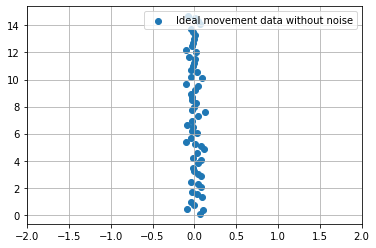

In [12]:
plt.figure()
plt.scatter(xPositions, yPositions, label = "Ideal movement data without noise")
plt.grid("True")
plt.legend()
plt.xlim(-2, 2)
plt.show()

### Analysis 1: timeToPredict = 6s, currentPoint = 4, amountOfPoints = 12

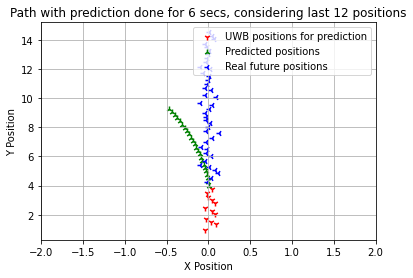

In [13]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 16
increment = 0
amountOfPoints = 12

startingPoint = currentPoint-amountOfPoints

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


In [14]:
errorList1 = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)

### Analysis 1.2: timeToPredict = 6s, startingPoint = 16, amountOfPoints = 12

In [15]:
xPositions = np.zeros(40)
yPositions = np.arange(0, 10, 0.25)

gaussianNoise = np.random.normal(0,0.05,40)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

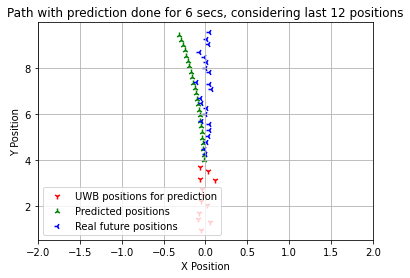

In [16]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 16 
increment = 0
amountOfPoints = 12 

startingPoint = currentPoint-amountOfPoints

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


In [17]:
errorList2 = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)

### Analysis 1.3: timeToPredict = 6s, startingPoint = 16, amountOfPoints = 12

In [18]:
xPositions = np.zeros(40)
yPositions = np.arange(0, 10, 0.25)

gaussianNoise = np.random.normal(0,0.05,40)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

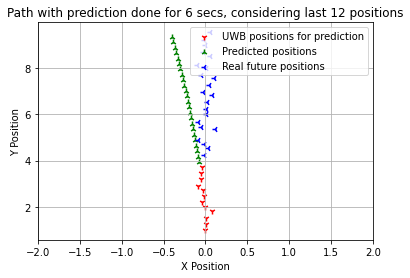

In [19]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 16 
increment = 0
amountOfPoints = 12 

startingPoint = currentPoint-amountOfPoints

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


In [20]:
errorList3 = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)

### Analysis 1.4: timeToPredict = 6s, currentPoint = 16, amountOfPoints = 12

In [21]:
xPositions = np.zeros(40)
yPositions = np.arange(0, 10, 0.25)
gaussianNoise = np.random.normal(0,0.05,40)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

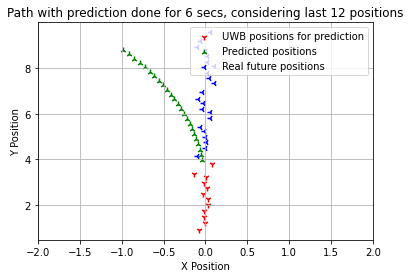

In [22]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 16 
increment = 0
amountOfPoints = 12 

startingPoint = currentPoint-amountOfPoints

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


In [23]:
errorList4 = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)

### Analysis 1.5: timeToPredict = 6s, startingPoint = 4, amountOfPoints = 12

In [24]:
xPositions = np.zeros(40)
yPositions = np.arange(0, 10, 0.25)
gaussianNoise = np.random.normal(0,0.05,40)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

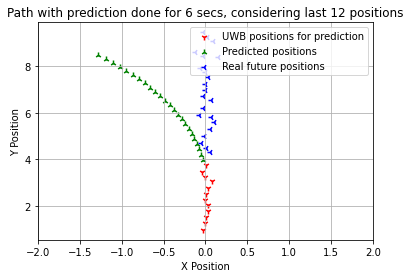

In [25]:
timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 16 
increment = 0
amountOfPoints = 12 

startingPoint = currentPoint-amountOfPoints

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter(xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


In [26]:
errorList5 = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)

### Total analysis of case 1: timeToPredict = 6s, startingPoint = 16, amountOfPoints = 12

In [27]:
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

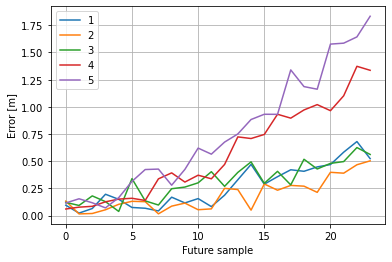

In [28]:
plt.figure()
plt.plot(sampleArray, errorList1, label = "1")
plt.plot(sampleArray, errorList2, label = "2")
plt.plot(sampleArray, errorList3, label = "3")
plt.plot(sampleArray, errorList4, label = "4")
plt.plot(sampleArray, errorList5, label = "5")
plt.legend()
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.show()

The average error for each one of the samples will be calculated.

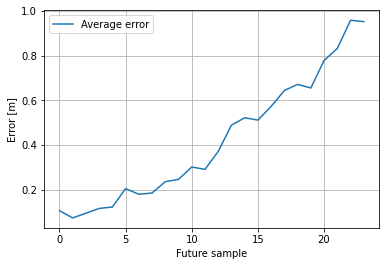

In [29]:
averageErrorList = []

index = 0

while index < len(errorList1):
    sumOfIndex = errorList1[index]+errorList2[index]+errorList3[index]+errorList4[index]+errorList5[index]
    average = sumOfIndex/5
    averageErrorList.append(average)
    
    index = index+1
    
plt.figure()
plt.plot(sampleArray, averageErrorList, label = "Average error")
plt.legend()
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.show()


# Monte Carlo simulation:

## Analysis 1: timeToPredict = 6s, currentPoint = 20, amountOfPoints = 12 (10000 iterations):

Due to the lack of consistency of the tests with a few iterations, more iterations have been done to identify a solid pattern. Every run the different calcualtions can vary a lot, but the result of the 10000 doesn't.

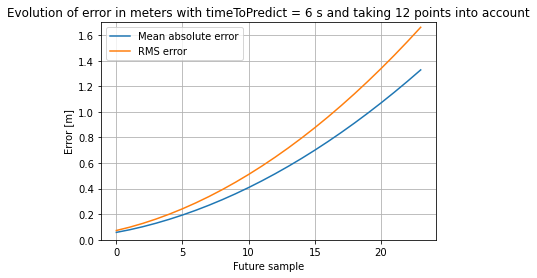

In [30]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 20 
increment = 0
amountOfPoints = 12 

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints

while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(60)
    yPositions = np.arange(0, 15, 0.25)
    
    gaussianNoise = np.random.normal(0,0.05,60)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    yPositionsWithNoise.clear()
    xPositionsWithNoise.clear()
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.ylim(0, 1.7)
plt.grid("True")
plt.show()


## Analysis 2: timeToPredict = 6s, currentPoint = 20, amountOfPoints = 16 (10000 iterations):

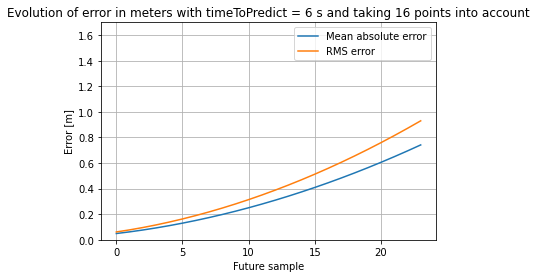

In [31]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 20 
increment = 0
amountOfPoints = 16 

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints
    
while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(60)
    yPositions = np.arange(0, 15, 0.25)
    
    gaussianNoise = np.random.normal(0,0.05,60)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    yPositionsWithNoise.clear()
    xPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.ylim(0, 1.7)
plt.grid("True")
plt.show()

## Analysis 2: timeToPredict = 6s, currentPoint = 20, amountOfPoints = 20 (10000 iterations):

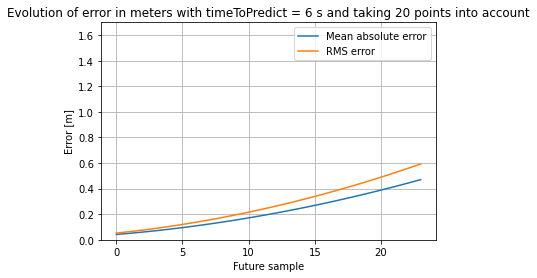

In [32]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
currentPoint = 20 
increment = 0
amountOfPoints = 20

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = currentPoint-amountOfPoints
    
while iterationIndex < amountOfIterations:
    
    xPositions = np.zeros(60)
    yPositions = np.arange(0, 15, 0.25)
    
    gaussianNoise = np.random.normal(0,0.05,60)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise) 
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    yPositionsWithNoise.clear()
    xPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.ylim(0, 1.7)
plt.grid("True")
plt.show()

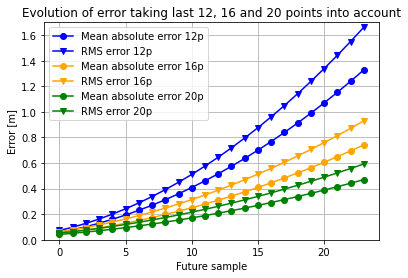

In [33]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.ylim(0, 1.7)
plt.legend()
plt.show()

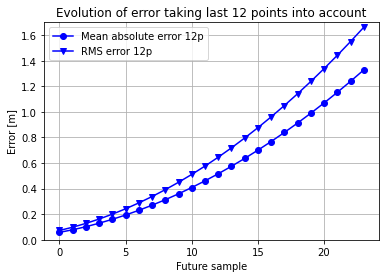

In [34]:
plt.figure()
plt.title("Evolution of error taking last 12 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.ylim(0, 1.7)
plt.legend()
plt.show()

No further analysis is required since the same results would be obtained by analysing other points of the path as it's a straight line.